In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

**CARREGAMENTO DE DADOS**


In [2]:
dataset = pd.read_csv('personagens.csv')

In [3]:
dataset.shape


(293, 7)

In [4]:
dataset.head()
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429134,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


<Axes: xlabel='classe', ylabel='count'>

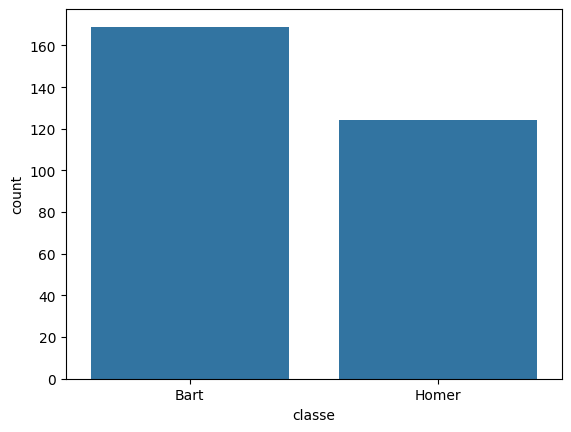

In [5]:
sns.countplot(x = 'classe', data = dataset )

In [6]:
#sns.heatmap(dataset.corr(), annot = True)

In [7]:
X = dataset.iloc[:, 0:6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [8]:
y = dataset.iloc[:, 6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [9]:
y = (y == 'Bart')
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size=0.2)

In [11]:
X_treinamento.shape, y_treinamento.shape

((234, 6), (234,))

In [12]:
X_teste.shape, y_teste.shape

((59, 6), (59,))

**CONSTRUÇÃO E TREINAMENTO DA REDE NEURAL**

In [13]:
(6 + 1)/2

3.5

In [14]:
#(entradas + saídas)/2
# 6 -> 4 -> 4 -> 4 -> 1

In [15]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 4, activation='relu', input_shape = (6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

c:\Users\caio_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
rede_neural.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4579 - loss: 0.8557 - val_accuracy: 0.3750 - val_loss: 0.8072
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5120 - loss: 0.7654 - val_accuracy: 0.3750 - val_loss: 0.7549
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4790 - loss: 0.7151 - val_accuracy: 0.4583 - val_loss: 0.7090
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5157 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6677
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5675 - loss: 0.6454 - val_accuracy: 0.6250 - val_loss: 0.6345
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6213 - loss: 0.6138 - val_accuracy: 0.7083 - val_loss: 0.6059
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6767 - loss: 0.6128 - val_accuracy: 0.7500 - val_loss: 0.5825
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6987 - loss: 0.5765 - val_accuracy: 0.7500 - val_loss: 0.5615
Epo

**AVALIAÇÃO DA REDE NEURAL**

In [19]:
historico.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

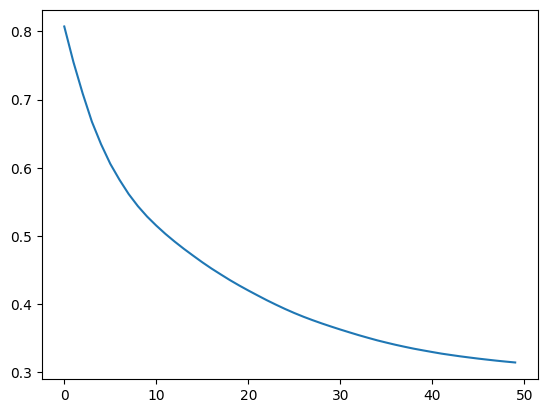

In [20]:
plt.plot(historico.history['val_loss'])

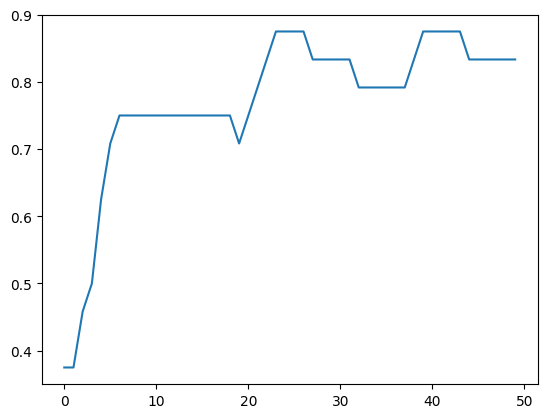

In [21]:
plt.plot(historico.history['val_accuracy'])

In [22]:
previsoes = rede_neural.predict(X_teste)
previsoes

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9968736 ],
       [0.66709757],
       [0.9966272 ],
       [0.07019839],
       [0.4977767 ],
       [0.9988801 ],
       [0.41996217],
       [0.483239  ],
       [0.45718917],
       [0.9992967 ],
       [0.97076327],
       [0.492898  ],
       [0.73196644],
       [0.49699733],
       [0.45743865],
       [0.49811593],
       [0.00408652],
       [0.9846444 ],
       [0.7940465 ],
       [0.07374623],
       [0.89074355],
       [0.9976043 ],
       [0.6165794 ],
       [0.9978812 ],
       [0.04119306],
       [0.9999901 ],
       [0.27355647],
       [0.49743026],
       [0.9749405 ],
       [0.54938793],
       [0.4965915 ],
       [0.12116516],
       [0.9891549 ],
       [0.4977767 ],
       [0.9974512 ],
       [0.9992898 ],
       [0.49580938],
       [0.05067328],
       [0.01887892],
       [0.9886046 ],
       [0.4969013 ],
       [0.9544282 ],
       [0.49486566],
       [0.46789032],
       [0.45718917],
       [0.99827534],
       [0.9258606 ],
       [0.331

In [23]:
# 1 ou True = Bart; 0 ou False = Homer

In [24]:
previsoes = (previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [25]:
y_teste

array([ True,  True,  True, False,  True,  True, False, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.8305084745762712

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
cm

array([[22,  0],
       [10, 27]], dtype=int64)

<Axes: >

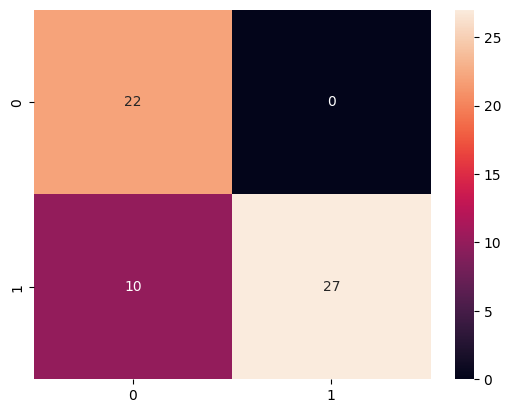

In [28]:
sns.heatmap(cm, annot = True)